In [4]:
import nilearn
from nilearn import plotting
from nilearn import datasets
from nilearn import image
from nilearn.image import mean_img
from nilearn.datasets import MNI152_FILE_PATH

import numpy as np
import pandas as pd

In [5]:
root_data='\\Users\\Asus\\Documents\\3oAno\\Estágio\\BIDS\\'
sub='sub-0001\\'
ses='ses-001'
data_path=root_data+sub+ses
print('The data is in this folder - '+data_path)

root_project="C:\\Users\\Asus\\Documents\\3oAno\\Estágio\\MVPA-speech-project"



The data is in this folder - \Users\Asus\Documents\3oAno\Estágio\BIDS\sub-0001\ses-001


# Structural data.

## Check registration using FSL BET (brain extraction) + FEAT

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\nilearn\image\resampling.py:527: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


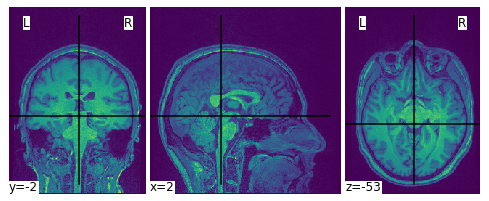

In [6]:
t1w_file_path=data_path+'/anat/sub-0001_ses-001_run-01_T1w.nii.gz'
plotting.plot_img(t1w_file_path)

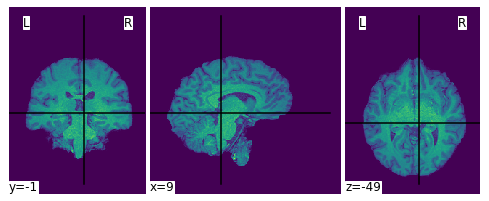

In [7]:
t1w_brain_file_path='\\Users\\Asus\\Documents\\3oAno\\Estágio\\BIDS\\sub-0001\\ses-001\\anat\\sub-0001_ses-001_run-01_T1w_brain.nii.gz'

plotting.plot_img(t1w_brain_file_path)

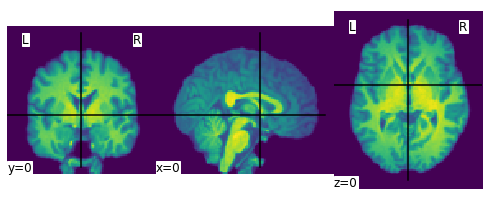

In [8]:
t1w_prepro_file_path='\\Users\\Asus\\Documents\\3oAno\\Estágio\\BIDS\\sub-0001\\ses-001\\run-1.feat\\reg\\highres2standard.nii.gz'

cut_coords=(0, 0, 0)
plotting.plot_img(t1w_prepro_file_path, cut_coords)

In [1]:
# (0,0,0) no standard MNI (mas tb em Talairach) aponta sempre para uma estrutura anatómica chamada de comissura anterior.
plotting.plot_img(datasets.MNI152_FILE_PATH, cut_coords)

NameError: name 'plotting' is not defined

# Functional data.
## Check preprocessing using FSL FEAT

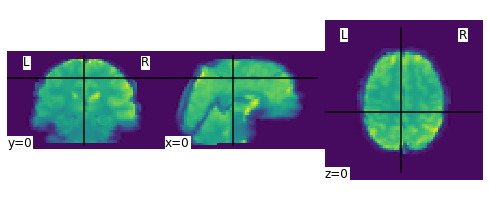

In [10]:
func_data_preproc='C:\\Users\\Asus\\Documents\\3oAno\\Estágio\\BIDS\\sub-0001\\ses-001\\run-1.feat\\filtered_func_data.nii.gz'

mean_fmri_img=mean_img(func_data_preproc) # media das imagens funcionais
plotting.plot_img(mean_fmri_img, cut_coords)

(91, 109, 91)


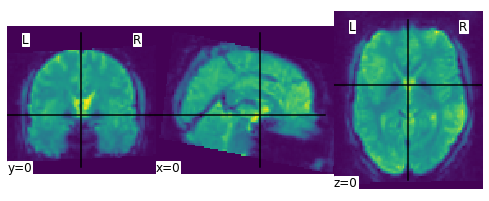

In [11]:
func_data_preproc_2high='C:\\Users\\Asus\\Documents\\3oAno\\Estágio\\BIDS\\sub-0001\\ses-001\\run-1.feat\\reg\\example_func2standard.nii.gz'

mean_fmri_img_2high=mean_img(func_data_preproc_2high)

print(image.load_img(func_data_preproc_2high).shape)

plotting.plot_img(mean_fmri_img_2high, cut_coords)

(91, 109, 91, 222)


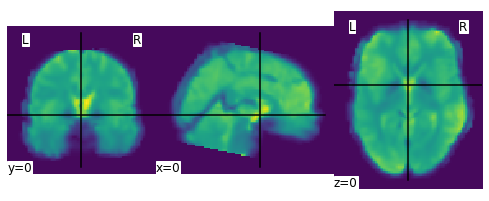

In [12]:
func_data_preproc2standard='C:\\Users\\Asus\\Documents\\3oAno\\Estágio\\BIDS\\sub-0001\\ses-001\\run-1.feat\\filtered_func_data2standard.nii.gz'
print(image.load_img(func_data_preproc2standard).shape)

mean_fmri_img_2standard=mean_img(func_data_preproc2standard)
plotting.plot_img(mean_fmri_img_2standard, cut_coords)

## Look at the events and design matrix.

In [13]:
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.plotting import plot_design_matrix

tr = 2.5  # repetition time is ? second
n_scans = 222  # the acquisition comprises ?? scans
frame_times = np.arange(n_scans) * tr  # here are the correspoding frame times

# load events.tsv
events_PATH='C:\\Users\\Asus\\Documents\\3oAno\\Estágio\\MVPA-speech-project\\convert-bids-admin\\DOCKER\\events.tsv'

events_df = pd.read_csv(events_PATH, sep='\t', na_values="n/a")
print(events_df.head())



  trial_type  onset  duration
0  Baseline     0.0      12.5
1      Task    15.0      27.5
2  Baseline    45.0      12.5
3      Task    60.0      27.5
4  Baseline    90.0      12.5


<AxesSubplot:label='conditions', ylabel='scan number'>

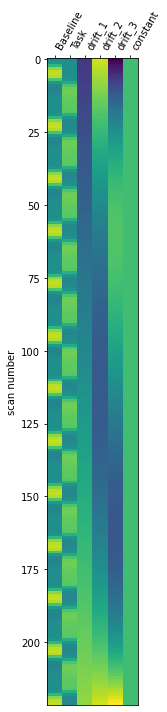

In [14]:
hrf_model='spm'
design_matrix = make_first_level_design_matrix(frame_times, events_df,
                                    drift_model='polynomial', drift_order=3,
                                    hrf_model=hrf_model)

plot_design_matrix(design_matrix)

**Statistical analysis - 1st level**

In [15]:
contrast_matrix = np.eye(design_matrix.shape[1])
basic_contrasts = dict([(column, contrast_matrix[i])
                        for i, column in enumerate(design_matrix.columns)])

basic_contrasts['+Task-Baseline'] = (
    basic_contrasts['Task ']
    - basic_contrasts['Baseline '])

In [16]:
basic_contrasts

{'Baseline ': array([1., 0., 0., 0., 0., 0.]),
 'Task ': array([0., 1., 0., 0., 0., 0.]),
 'drift_1': array([0., 0., 1., 0., 0., 0.]),
 'drift_2': array([0., 0., 0., 1., 0., 0.]),
 'drift_3': array([0., 0., 0., 0., 1., 0.]),
 'constant': array([0., 0., 0., 0., 0., 1.]),
 '+Task-Baseline': array([-1.,  1.,  0.,  0.,  0.,  0.])}

In [17]:
from nilearn.glm.first_level import FirstLevelModel

fmri_img='C:\\Users\\Asus\\Documents\\3oAno\\Estágio\\BIDS\\sub-0001\\ses-001\\run-1.feat\\filtered_func_data2standard.nii.gz'
print(image.load_img(fmri_img).shape)
print('Fitting a GLM')
fmri_glm = FirstLevelModel()
fmri_glm = fmri_glm.fit(fmri_img, design_matrices=design_matrix)

(91, 109, 91, 222)
Fitting a GLM


In [18]:
mean_image = mean_img(fmri_img)
z_map = fmri_glm.compute_contrast(basic_contrasts['+Task-Baseline'], output_type='z_score')

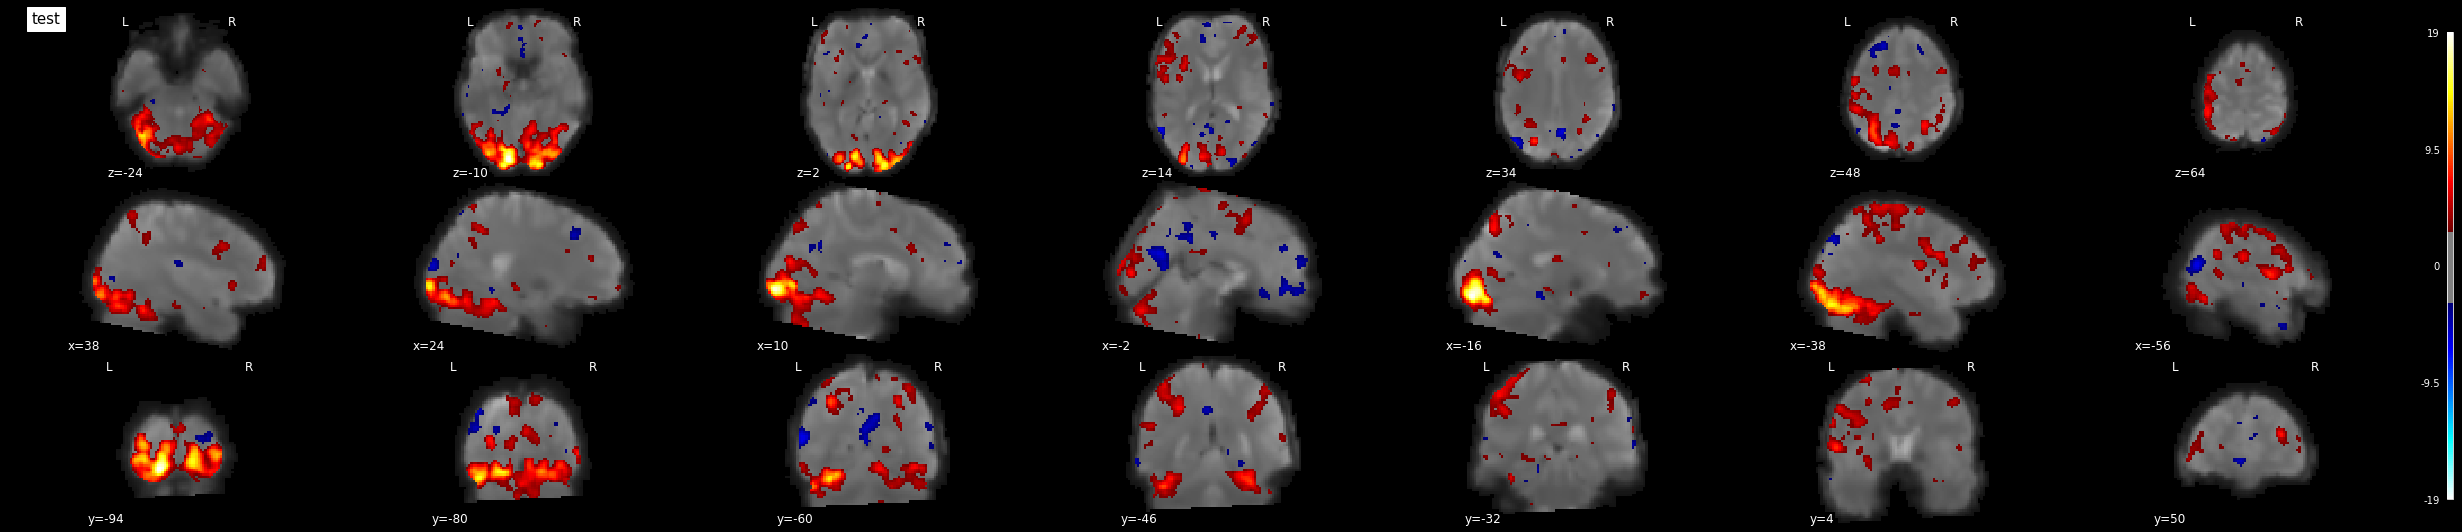

In [19]:
# plot the contrasts 
# the display is overlayed on the mean fMRI image
# a threshold of 3.0 is used, more sophisticated choices are possible
plotting.plot_stat_map(
    z_map, bg_img=mean_image, threshold=3, display_mode='mosaic', black_bg=True, title='test')
plotting.show()



# Decoding


## Creating a mask

In [23]:
from nilearn.input_data import NiftiMasker
import nilearn.image as image
from nilearn.plotting import plot_roi

masker = NiftiMasker()
z_map_w_thresh= nilearn.image.threshold_img(z_map, threshold=3, copy=False)
masker.fit(z_map_w_thresh)
z_map_maskt3=masker.mask_img_

masker = NiftiMasker()
z_map_w_thresh= nilearn.image.threshold_img(z_map, threshold=4, copy=False)
masker.fit(z_map_w_thresh)
z_map_mask=masker.mask_img_

In [24]:
 brain_mask = datasets.load_mni152_brain_mask()

from nilearn.datasets import fetch_icbm152_brain_gm_mask
brain_mask = fetch_icbm152_brain_gm_mask()

## Decoding

In [25]:
from nilearn.decoding import Decoder 

decoder = Decoder(estimator='svc', mask=z_map_mask) 

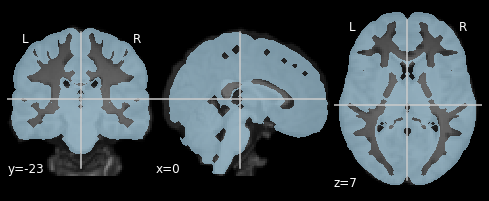

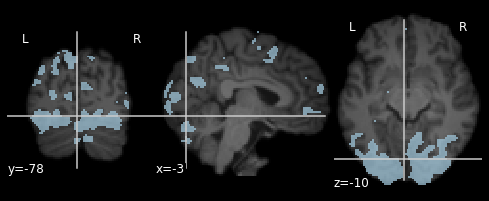

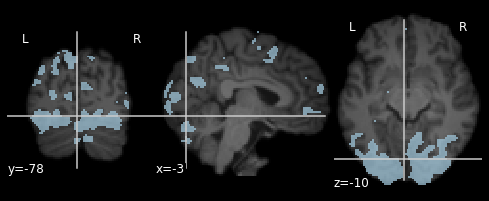

In [26]:
plotting.plot_roi(brain_mask, bg_img=t1w_prepro_file_path,
                  cmap='Paired')
plotting.plot_roi(z_map_maskt3, bg_img=t1w_prepro_file_path,
                  cmap='Paired')
plotting.plot_roi(z_map_maskt4, bg_img=t1w_prepro_file_path,
                  cmap='Paired')

In [27]:
fmri_niiimgs=image.load_img(func_data_preproc2standard)
fmri_niiimgs.shape

(91, 109, 91, 222)

In [28]:
idxs=events_df['onset']/tr
conditions = []

for i in range(len(events_df)):
    idx_2=((events_df['duration'][i]/tr))+1
    for j in range(int(idx_2)):
        conditions.append(events_df['trial_type'][i])

In [29]:
# Manual trainset separation
from nilearn.image import index_img
trainset = index_img(fmri_niiimgs, slice(0, -50))
trainset.shape


(91, 109, 91, 172)

## Attempt to do cross-validation

In [30]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=3)

fold = 0
for train, test in cv.split(conditions):
    fold += 1
    decoder = Decoder(estimator='svc', mask=z_map_mask, standardize=True)
    decoder.fit(index_img(fmri_niiimgs, train), [conditions[i] for i in train])
    prediction = decoder.predict(index_img(fmri_niiimgs, test))
    print(
        "CV Fold {:01d} | Prediction Accuracy: {:.3f}".format(
            fold,
            (prediction == [conditions[i] for i in test]).sum() / float(len(
                test))))

"""
Accuracy:

com brain_mask: 
Fold 1 - 0.730
Fold 2 - 0.784
Fold 3 - 0.851

com z_map_mask, threshold=3:
Fold 1 - 0.784
Fold 2 - 0.838
Fold 3 - 0.824

com z_map_mask, threshold=4:
Fold 1 - 0.797
Fold 2 - 0.770
Fold 3 - 0.851
"""

CV Fold 1 | Prediction Accuracy: 0.797
CV Fold 2 | Prediction Accuracy: 0.770
CV Fold 3 | Prediction Accuracy: 0.851


'\nAccuracy:\n\ncom brain_mask: \nFold 1 - 0.730\nFold 2 - 0.784\nFold 3 - 0.851\n\ncom z_map_mask, threshold=3:\nFold 1 - 0.784\nFold 2 - 0.838\nFold 3 - 0.824\n\ncom z_map_mask, threshold=4:\nFold 1 - 0.797\nFold 2 - 0.770\nFold 3 - 0.851\n'

In [ ]:
print(decoder.cv_scores_) 

In [ ]:
testset = index_img(fmri_niiimgs, slice(-50,None))
testset.shape

In [ ]:
prediction=decoder.predict(testset)

In [113]:
print((prediction == conditions[-50:]).sum() / float(len(conditions[-50:])))

#com gm_mask, temos uma accuracy de 0.92
#com z_map_mask, temos uma accuracy de 0.9

0.9



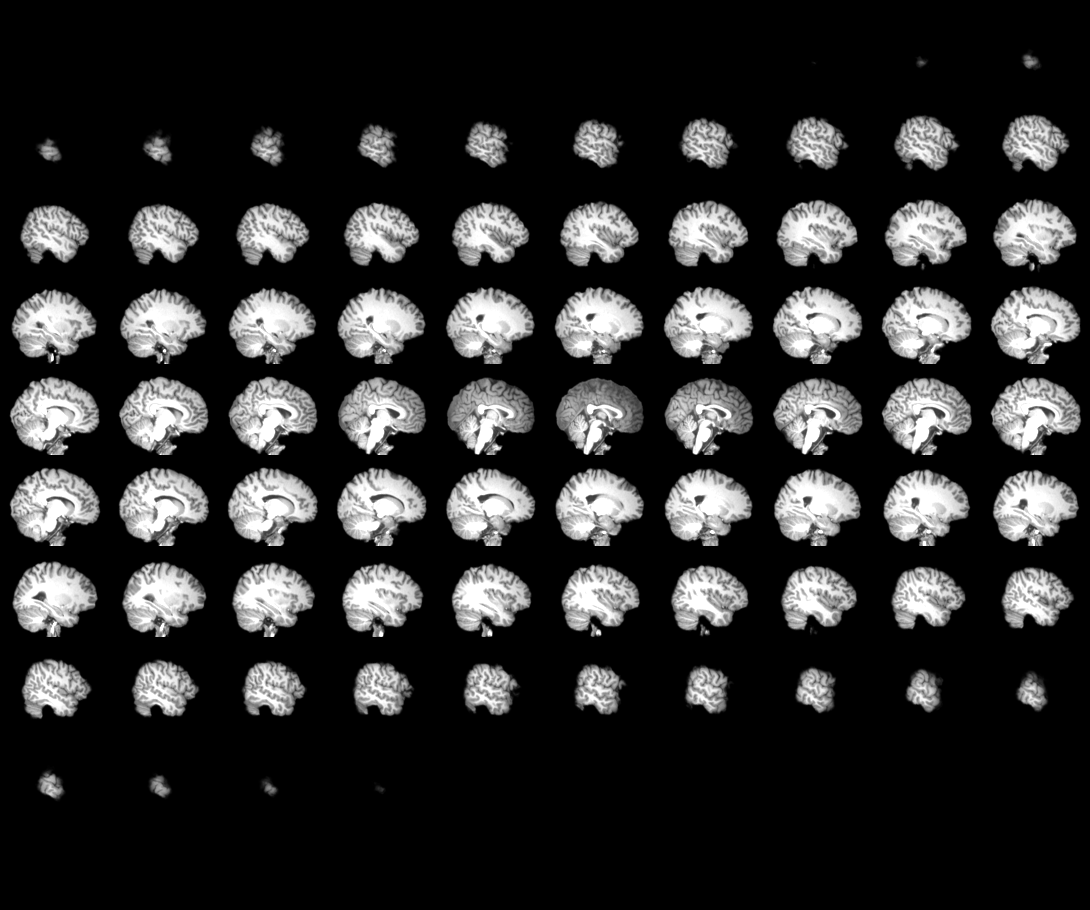
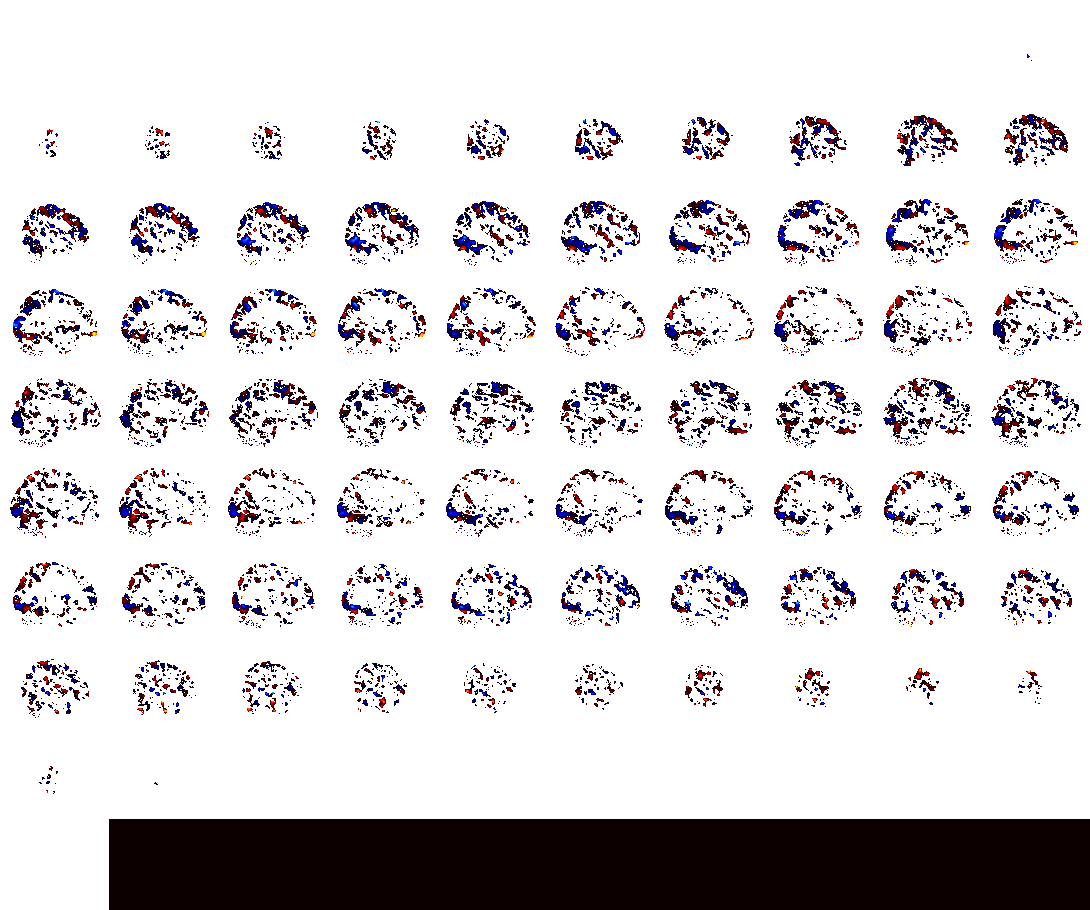

In [66]:
plotting.view_img(
    decoder.coef_img_['Task '], bg_img=t1w_prepro_file_path,
    title="SVM weights", dim=-1
)

# dummy decoder - como avaliar a qualidade de um classificador?

In [67]:
dummy_decoder = Decoder(estimator='dummy_classifier', mask=brain_mask)

dummy_decoder.fit(trainset, conditions[:-50]) 

dummy_prediction=dummy_decoder.predict(trainset)


In [69]:
dummy_decoder.dummy_output_

array([[0.34883955, 0.65116045]])